In [136]:
from IPython.core.debugger import set_trace
import numpy as np
import sys
import collections
import matplotlib
import matplotlib.pyplot as plt


f=open('day18input.txt') #not with read because thats probably the whole file
lines = [line.rstrip('\n') for line in f]

In [137]:
neighborarray = np.array([(-1,-1),(-1,0),(-1,1),(0,-1),(0,1),(1,-1),(1,0),(1,1)])

def getneighbors(cell,forest):
    neighbors = cell+neighborarray

    return [tuple(x) for x in neighbors if (x[0]>=0 and x[1]>=0 and x[0]<forest.shape[0] and x[1]<forest.shape[1])]
    

def transformforest(forest):
    newforest = forest.copy()
    for cell, value in np.ndenumerate(forest):
        neighborindices = getneighbors(cell,forest)
        neighborvalues = [forest[n] for n in neighborindices]
        neighbortotal = sum(neighborvalues)          
        if value == 0:#open becomes forest is 3 or more trees
            if neighbortotal//10>=3: newforest[cell]=10
        elif value == 1:#lumbercamp becomes open is not >=1 lumber and >=1 forest
            if not (neighbortotal%10>=1 and neighbortotal//10>=1): newforest[cell]=0
        elif value ==10: #trees become lumberyard if at least 3 lumberyards
            if neighbortotal%10>=3: newforest[cell]=1
    return newforest


In [138]:
forest =[]
dic = {'.':0, '#':1, '|':10}
forestsum = []
foresttrees = []
forestlumber = []
for line in lines:
    #print (list(line))
    forest.append(([dic[b] for b in list(line)]))
forest = np.array(forest)

In [139]:
def iterate():
    global forest
    print ('after round 0\n', forest)
    for i in range(1,1000):
        if i%100==0:print(i,'\n',forest)
        forest = transformforest(forest)
        foresttrees.append(np.count_nonzero(np.array(forest==10)))
        forestlumber.append(np.count_nonzero(np.array(forest==1)))
        
        
        forestsum.append(np.sum(forest))
        #print ('after round',i,',\n',forest)
    return (forestsum,foresttrees,forestlumber,forest)
            
#%load_ext line_profiler           
#%lprun -f transformforest end=iterate()
forestsum,foresttrees,forestlumber,forest = iterate()

after round 0
 [[10 10  0 ...,  0  1  0]
 [ 0  0  0 ...,  0  1  0]
 [ 1  1  0 ..., 10  0  0]
 ..., 
 [ 1  0 10 ..., 10  1 10]
 [ 0  0 10 ...,  1  0  0]
 [ 0  0 10 ...,  1  0  0]]
100 
 [[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  1  1]
 [ 0  0  0 ...,  1  1  1]
 [ 0  0  0 ...,  1 10 10]]
200 
 [[10  1  1 ...,  0  0  0]
 [10  1  1 ...,  0  0  0]
 [ 1  1  0 ..., 10  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]
300 
 [[ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  1  1]
 [ 0  0  0 ...,  1  1  1]
 [ 0  0  0 ...,  1 10 10]]
400 
 [[ 0  0  0 ..., 10  0  0]
 [ 0  0  0 ..., 10 10  0]
 [ 0  0  0 ..., 10 10  0]
 ..., 
 [ 1  1  0 ...,  1 10 10]
 [ 1  1  1 ..., 10 10 10]
 [10 10  1 ..., 10 10  0]]
500 
 [[ 0  0 10 ...,  0  0  0]
 [ 0 10 10 ...,  0  0  0]
 [ 0 10 10 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  1  1 10]
 [ 0  0  0 ...,  1  1 10

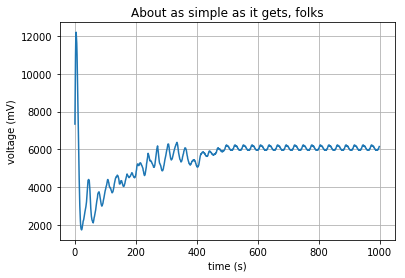

In [142]:

# Data for plotting
y = forestsum
x = range(1,1000)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

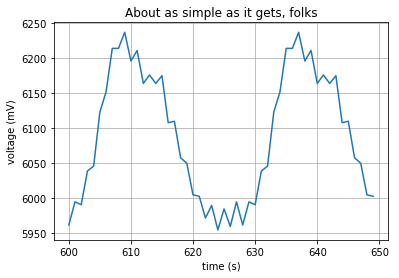

In [143]:

# Data for plotting
y = forestsum[600:650]
x = range(600,650)

fig, ax = plt.subplots()
ax.plot(x, y)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

fig.savefig("test.png")
plt.show()

In [144]:
forestsum[610]

6196

In [145]:
forestsum[638]

6196

In [146]:
638-610

28

In [147]:
610%28

22

In [153]:
i = 10
foresttrees[i]*forestlumber[i]

417020

In [149]:
i = 638
foresttrees[i]*forestlumber[i]

202410

In [151]:
1000000000%28

20

In [156]:
i = 607
foresttrees[i]*forestlumber[i]

190836

In [155]:
for i in range (8,12):
    print (i,foresttrees[i]*forestlumber[i])

8 528814
9 486878
10 417020
11 312374


In [ ]:
608 196392 too high